<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/Fish_Image_Classification_My_model01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical') 
test_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

valid_fed = rescaled.flow_from_directory(
    '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/valid_test_data',
                                target_size=(128,128),batch_size=32,class_mode= 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,padding='same', strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                   
                                    
                                    tf.keras.layers.Conv2D(32,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                 

                                    tf.keras.layers.Conv2D(64,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   

                                    tf.keras.layers.Conv2D(128,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                  

                                    tf.keras.layers.Conv2D(256,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                                                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),                               

                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

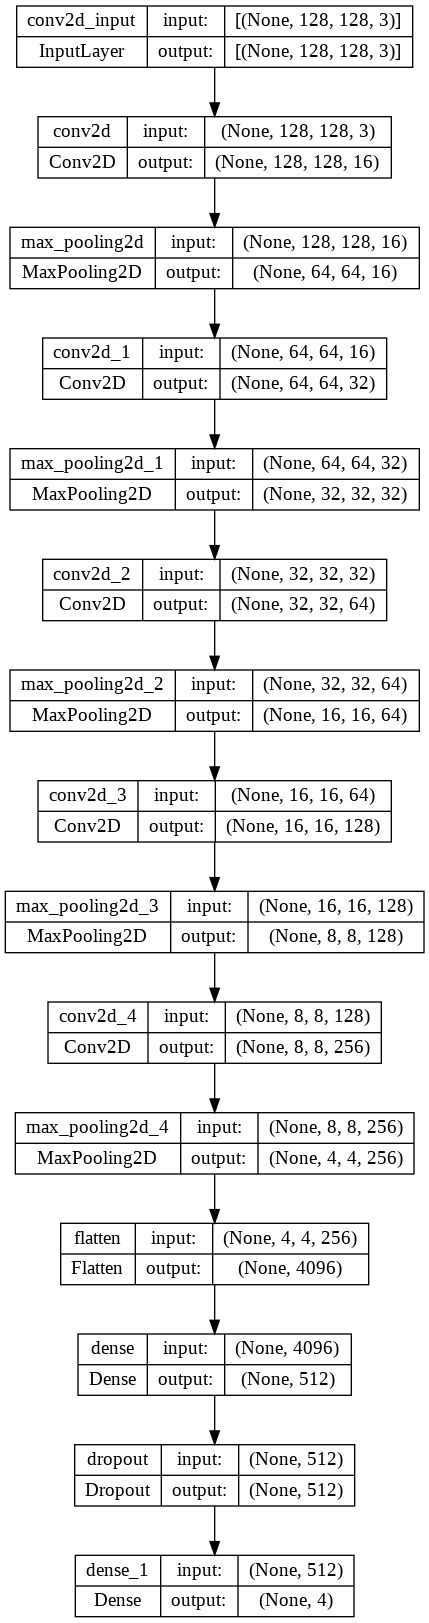

In [ ]:
plot_model(model = model,show_shapes = True)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [ ]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part seven/my_model_seven.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 3,factor = 0.1)

In [ ]:
hist = model.fit_generator(train_fed, shuffle = True, epochs=20, validation_data=test_fed,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2
                           )

<ipython-input-13-e0e9ff04e90b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_fed, shuffle = True, epochs=20, validation_data=test_fed,
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
150/150 - 4287s - loss: 1.5587 - accuracy: 0.6162 - val_loss: 0.6257 - val_accuracy: 0.7683 - lr: 1.0000e-04 - 4287s/epoch - 29s/step
Epoch 2/20
150/150 - 35s - loss: 0.4623 - accuracy: 0.8265 - val_loss: 0.5599 - val_accuracy: 0.7933 - lr: 1.0000e-04 - 35s/epoch - 233ms/step
Epoch 3/20
150/150 - 37s - loss: 0.3227 - accuracy: 0.8817 - val_loss: 0.2733 - val_accuracy: 0.9075 - lr: 1.0000e-04 - 37s/epoch - 244ms/step
Epoch 4/20
150/150 - 37s - loss: 0.2118 - accuracy: 0.9258 - val_loss: 0.2267 - val_accuracy: 0.9183 - lr: 1.0000e-04 - 37s/epoch - 246ms/step
Epoch 5/20
150/150 - 35s - loss: 0.1645 - accuracy: 0.9433 - val_loss: 0.1661 - val_accuracy: 0.9408 - lr: 1.0000e-04 - 35s/epoch - 231ms/step
Epoch 6/20
150/150 - 35s - loss: 0.1210 - accuracy: 0.9560 - val_loss: 0.1552 - val_accuracy: 0.9533 - lr: 1.0000e-04 - 35s/epoch - 230ms/step
Epoch 7/20
150/150 - 35s - loss: 0.0975 - accuracy: 0.9642 - val_loss: 0.1148 - val_accuracy: 0.9642 - lr: 1.0000e-04 - 35s/epoch - 236ms/st

In [ ]:
acc = model.evaluate(test_fed,steps = len(test_fed),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 7s - loss: 0.0296 - accuracy: 0.9875 - 7s/epoch - 176ms/step
98.75


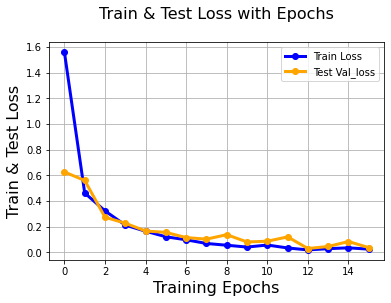

In [ ]:

plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

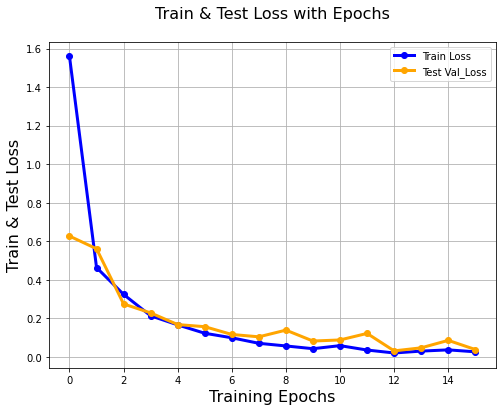

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

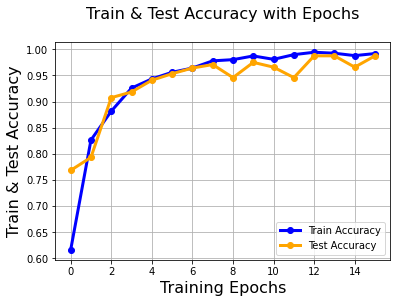

In [ ]:

plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

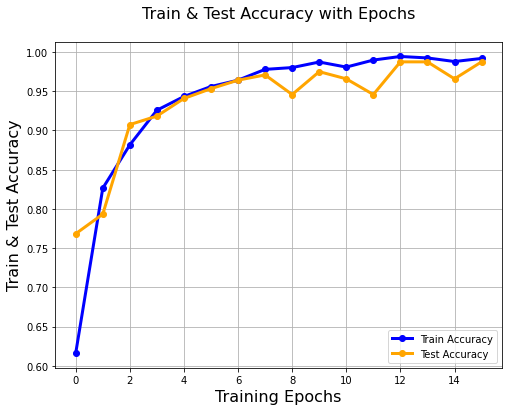

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [ ]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')


1/1 [==============================] - 0s 220ms/step
[[1.1269051e-10 6.3544968e-12 9.1661964e-12 1.0000000e+00]]
[3, 0, 2, 1]
Tilapia_Fish : 100.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [ ]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 006.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 15ms/step
[[9.9916351e-01 1.4750665e-07 8.3631085e-04 1.0911762e-07]]
[0, 2, 1, 3]
Barbel_Fish : 99.92 %
Spotted_Snakehead_Fish : 0.08 %
Hilsha_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [ ]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 005.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 17ms/step
[[1.50173514e-06 1.87086566e-17 9.99998450e-01 1.11041716e-13]]
[2, 0, 3, 1]
Spotted_Snakehead_Fish : 100.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %
Hilsha_Fish : 0.0 %


In [ ]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 049.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 21ms/step
[[2.3952541e-08 9.9996018e-01 5.7985661e-11 3.9813309e-05]]
[1, 3, 0, 2]
Hilsha_Fish : 100.0 %
Tilapia_Fish : 0.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
